In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.utils import shuffle
import seaborn as sns
from sklearn import datasets
import random
import math
import warnings
from sklearn.metrics import confusion_matrix
warnings.filterwarnings('ignore')

In [2]:

df = pd.read_csv("inflation.csv", encoding='utf-8')
fd=df.copy()
fd=fd[fd["Year"]<=2019]
df = df[df['Year'] <= 2019]
df=df.drop("Id",axis=1)
df2 = df.copy()
df2["Year"] = pd.to_datetime(df2["Year"].astype(int), format="%Y")#after i filtered df by year my years in first graph graph become float. I fixed it here

# Read in the "freedom.csv" file and store it in a DataFrame called "dfree"
dfree=pd.read_csv("freedom.csv", encoding='utf-8')# financial_freedom dataset
dfree.head(6)
# Round down the values in the "index_year" column to the nearest integer using the math.floor function
dfree['index_year'] = (dfree['index_year']).apply(math.floor)
# Filter the DataFrame to include only rows where the "index_year" column is greater than or equal to 2000
dfree = dfree[dfree['index_year'] >= 2000]
# Group the rows of the DataFrame by the "index_year" column and compute the mean of each group
df_agg = dfree.groupby(['index_year'],as_index=False).agg('mean')
# Drop the judicial_effectiveness, fiscal_health, and labor_freedom columns from the DataFrame
df_agg = df_agg.drop('judicial_effectiveness', axis=1)
df_agg = df_agg.drop('fiscal_health', axis=1)
df_agg = df_agg.drop('labor_freedom', axis=1)
df_agg.head()


,index_year,overall_score,property_rights,government_integrity,tax_burden,government_spending,business_freedom,monetary_freedom,trade_freedom,investment_freedom,financial_freedom
0,2000,58.083750,52.187500,39.481250,67.414375,66.513125,63.718750,70.865625,61.213750,53.500000,47.875000
1,2001,59.154839,51.741935,40.412903,68.270968,67.824516,63.612903,74.085806,63.917419,53.741935,48.774194
2,2002,59.154140,48.789809,39.808917,69.512102,66.875159,62.547771,75.114013,64.692994,54.458599,50.573248
3,2003,59.609554,48.598726,39.515924,71.399363,67.656688,63.025478,75.848408,64.150318,53.439490,52.866242
4,2004,59.600645,47.870968,39.754839,71.826452,66.400645,63.322581,76.883226,64.747097,52.451613,53.161290


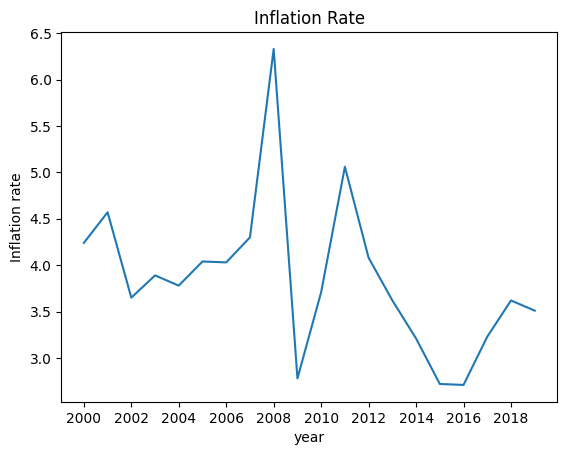

In [3]:
# Create a line plot using the Year column as the x-axis and the InflationRate column as the y-axis
plt.plot(df2["Year"], df2["InflationRate"])# this plot shows before our regression, the real dataset
# Add a title to the plot
plt.title('Inflation Rate')
# Label the x-axis
plt.xlabel('year')
# Label the y-axis
plt.ylabel('Inflation rate')
plt.show()

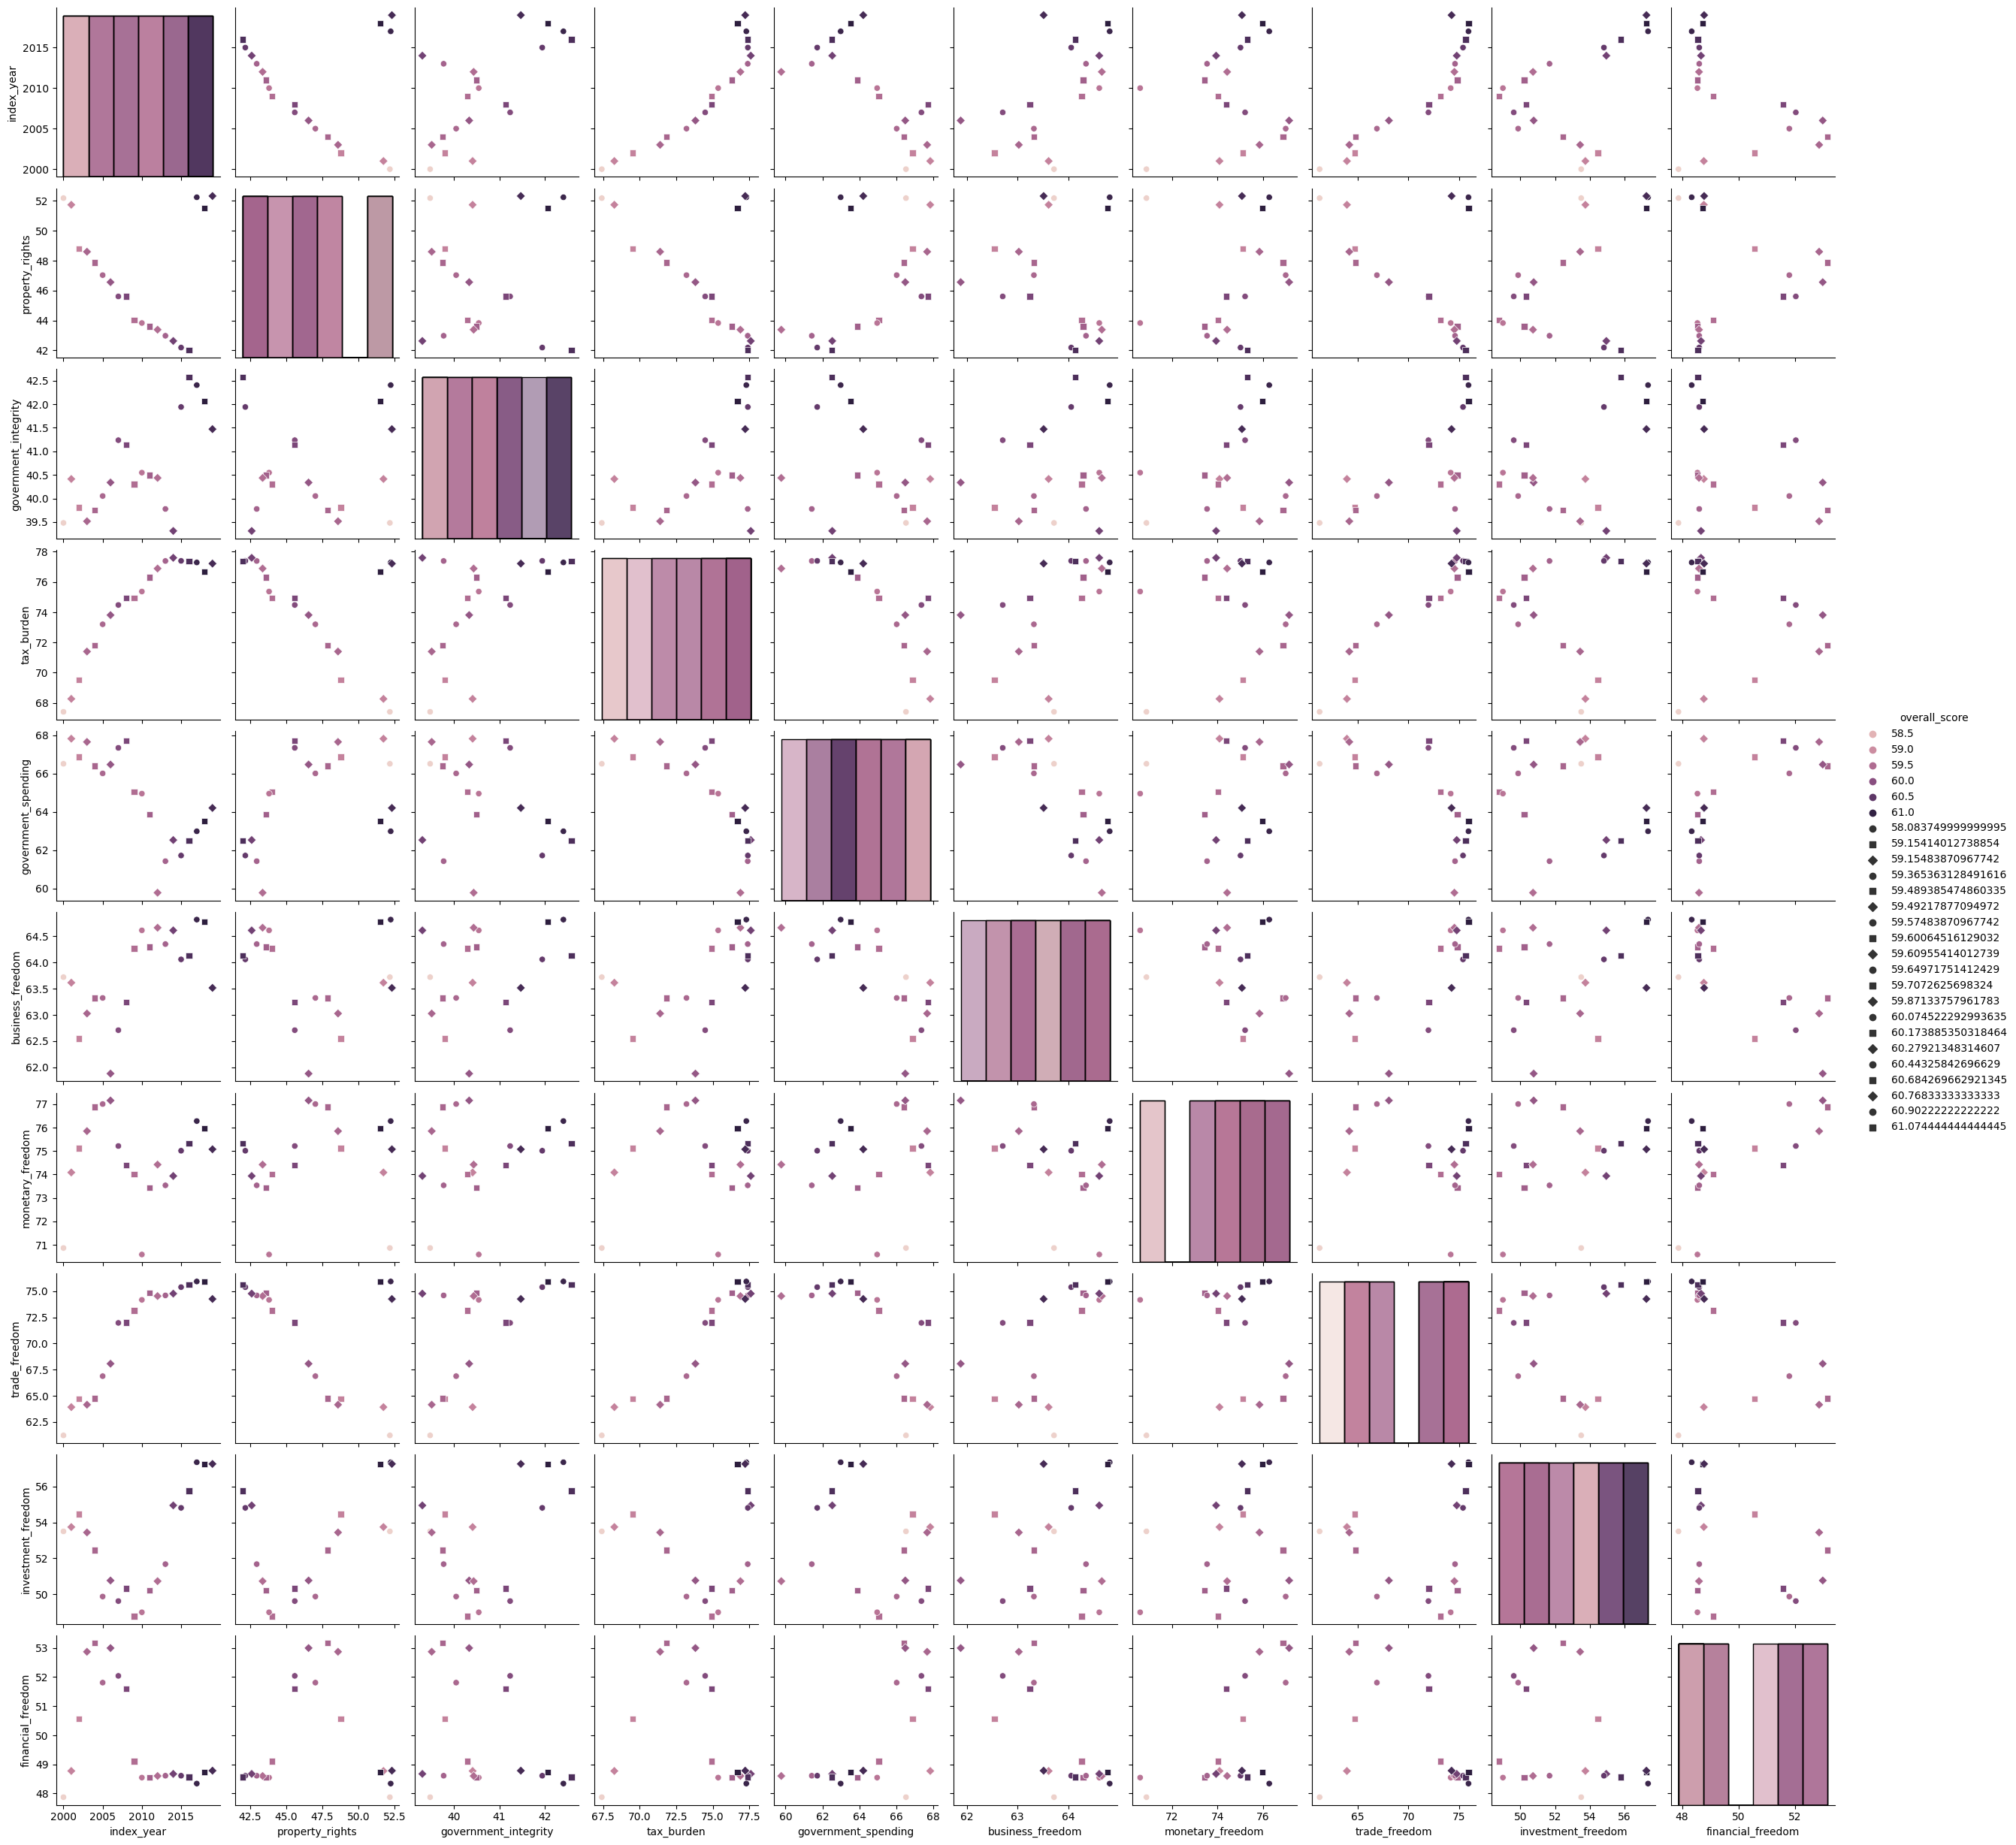

In [4]:
g = sns.pairplot(df_agg, hue='overall_score',markers=["o", "s", "D"],diag_kind="hist")#created a pairplot using df_agg dataframe
plt.show()

In [5]:
df.head(20)

,Year,InflationRate
0,2000,4.24
1,2001,4.57
2,2002,3.65
3,2003,3.89
4,2004,3.78
5,2005,4.04
6,2006,4.03
7,2007,4.30
8,2008,6.33
9,2009,2.78


<AxesSubplot: ylabel='Frequency'>

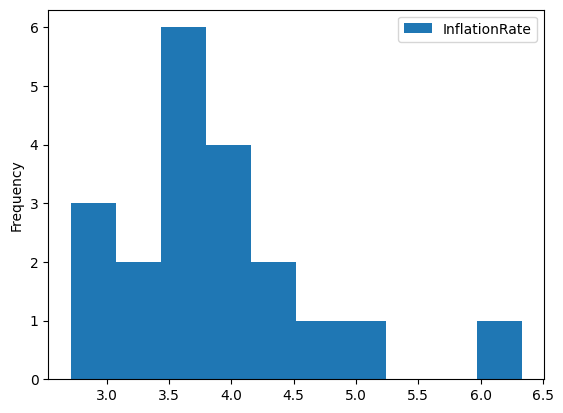

In [6]:
df2.plot.hist()#this plot shows us that frequency of the inflation 2000 to 2019

In [7]:
X = df_agg[['index_year','trade_freedom', 'financial_freedom']]
y= df

# Splitting the Dataset %70 %30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state= 11,shuffle=False)

regr = LinearRegression()
regr.fit(X_train,y_train)#we start train our model
X_train.shape
X_test.shape
y_train.shape

(14, 2)

In [8]:
prediction = regr.predict(X_test)#our prediction func. using X_test
print('Mean Absolute Error:', mean_absolute_error(y_test, prediction))#here we calculated mean and squared error using our prediction and test datas
print('Mean Squared Error:', mean_squared_error(y_test, prediction))
ek = pd.DataFrame(prediction, columns = ['Year','InflationRate'])
new_df=pd.concat([y_train,ek])# we concat our predicted values with train datas
new_df=new_df.reset_index(drop=True)#reseted index
new_df['Year'] = df['Year'].astype(int)#converted year data to integer
new_df.head(20)

Mean Absolute Error: 0.2904499372296836
Mean Squared Error: 0.2154866693630745


,Year,InflationRate
0,2000,4.240000
1,2001,4.570000
2,2002,3.650000
3,2003,3.890000
4,2004,3.780000
5,2005,4.040000
6,2006,4.030000
7,2007,4.300000
8,2008,6.330000
9,2009,2.780000


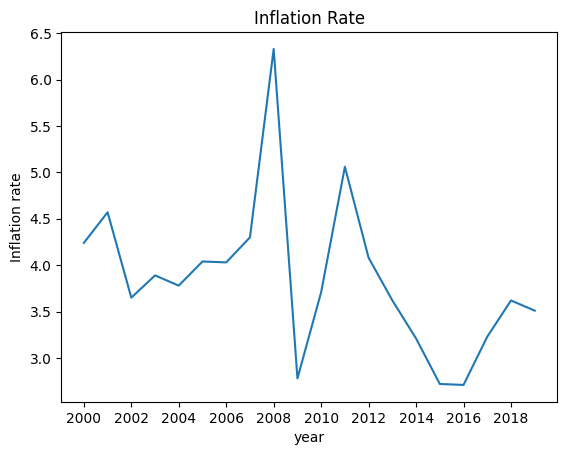

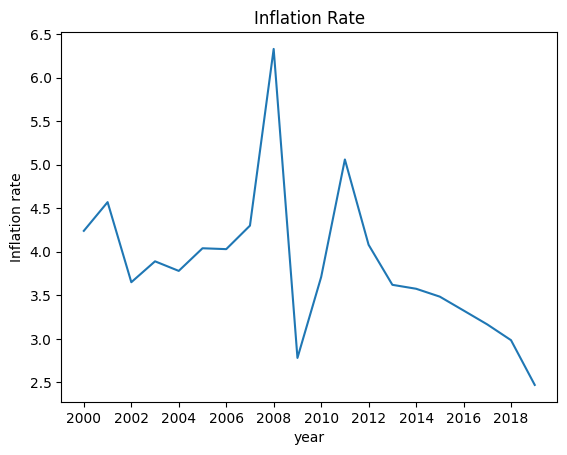

In [12]:
# Here we printed our first chart again to see differences
plt.plot(df2["Year"], df2["InflationRate"])# this plot shows before our regression, the real dataset
# Add a title to the plot
plt.title('Inflation Rate')
# Label the x-axis
plt.xlabel('year')
# Label the y-axis
plt.ylabel('Inflation rate')
plt.show()

xd = pd.to_datetime(new_df["Year"].astype(int), format="%Y")#after i filtered df by year my years in second sections's graph become float. I fixed it here
plt.plot(xd, new_df["InflationRate"])
plt.title('Inflation Rate')
plt.xlabel('year')
plt.ylabel('Inflation rate')
plt.show()

Our non predicted original datas


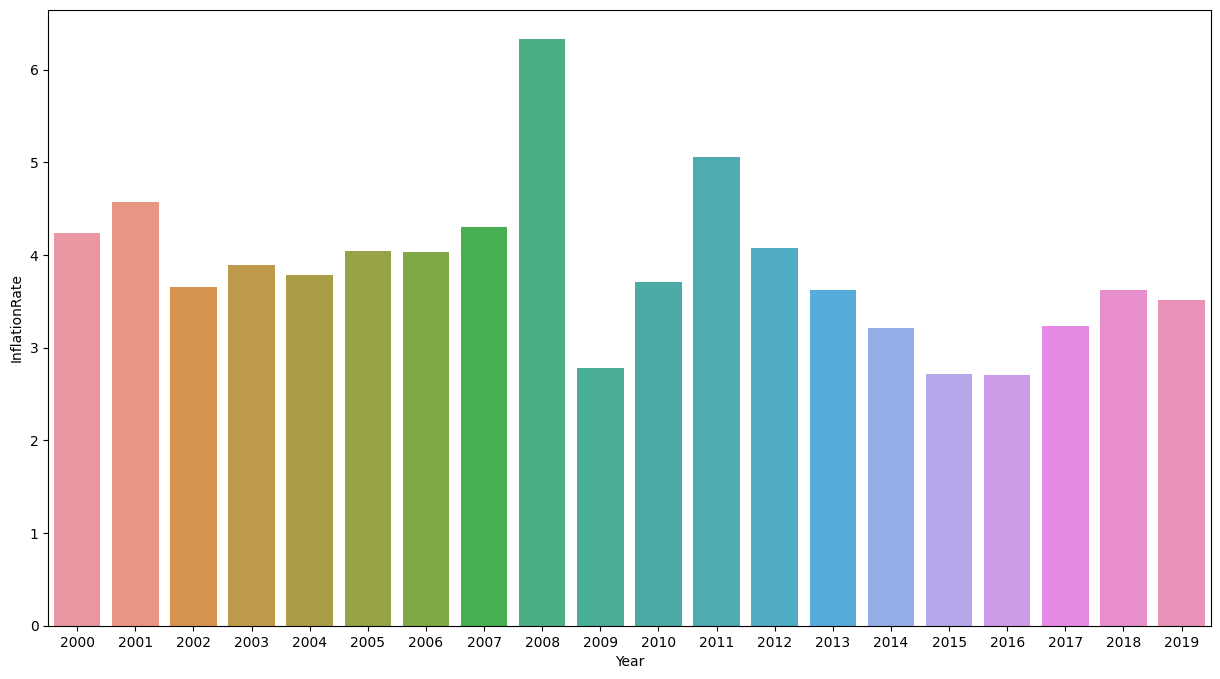

In [10]:
print("Our non predicted original datas")
# we created a bar plot with a specified figure size
plt.figure(figsize=(15,8))
# we used the seaborn "barplot" function to create a bar plot with the "Year" column as the x-axis and the InflationRate column as the y-axis
sns.barplot(x = 'Year',y = 'InflationRate',data = fd)
plt.show()

Our real datas + predicted datas


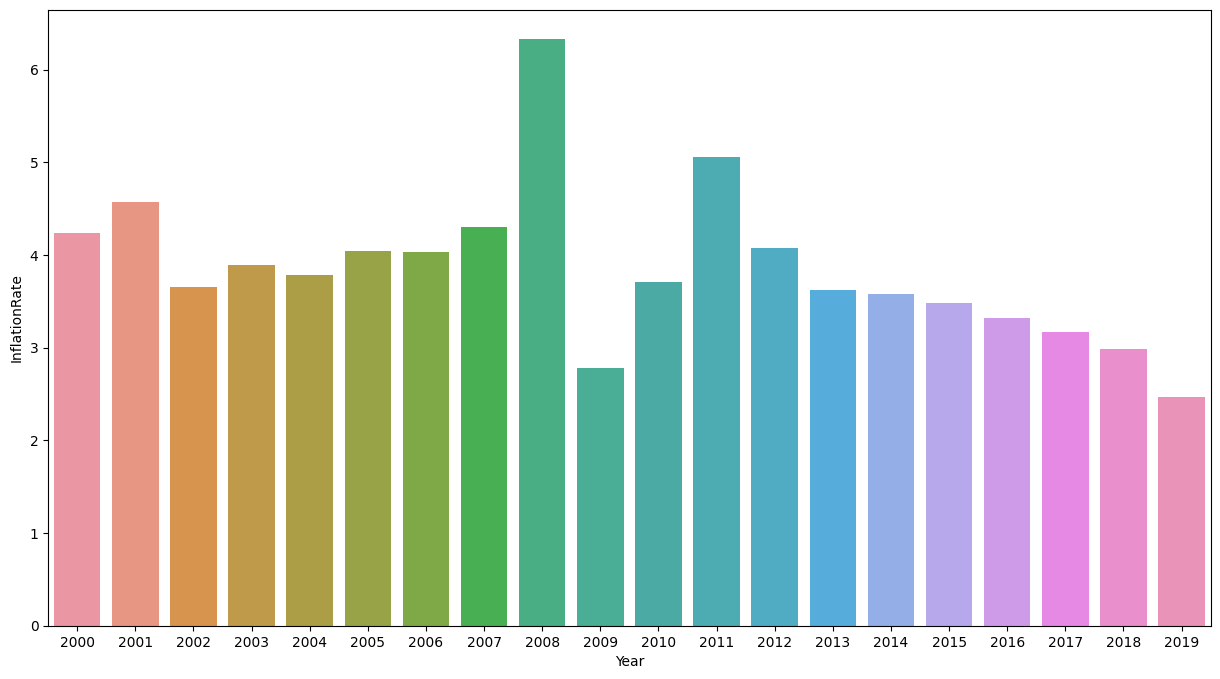

In [11]:
print("Our real datas + predicted datas")
# we created a bar plot with a specified figure size
plt.figure(figsize=(15,8))#we created a inflation rate year by year matplotlib figure
sns.barplot(x = 'Year',y = 'InflationRate',data = new_df)
plt.show()